Epoch 1/50
40/40 [==============================] - 1s 3ms/step - loss: 0.4000 - mae: 0.4949 - val_loss: 0.1087 - val_mae: 0.2657
Epoch 2/50
40/40 [==============================] - 0s 1ms/step - loss: 0.1635 - mae: 0.3158 - val_loss: 0.0545 - val_mae: 0.1814
Epoch 3/50
40/40 [==============================] - 0s 999us/step - loss: 0.1276 - mae: 0.2782 - val_loss: 0.0478 - val_mae: 0.1705
Epoch 4/50
40/40 [==============================] - 0s 931us/step - loss: 0.1257 - mae: 0.2765 - val_loss: 0.0303 - val_mae: 0.1294
Epoch 5/50
40/40 [==============================] - 0s 928us/step - loss: 0.1047 - mae: 0.2516 - val_loss: 0.0376 - val_mae: 0.1510
Epoch 6/50
40/40 [==============================] - 0s 901us/step - loss: 0.1041 - mae: 0.2475 - val_loss: 0.0345 - val_mae: 0.1457
Epoch 7/50
40/40 [==============================] - 0s 913us/step - loss: 0.0883 - mae: 0.2278 - val_loss: 0.0326 - val_mae: 0.1393
Epoch 8/50
40/40 [==============================] - 0s 878us/step - loss: 0.0922

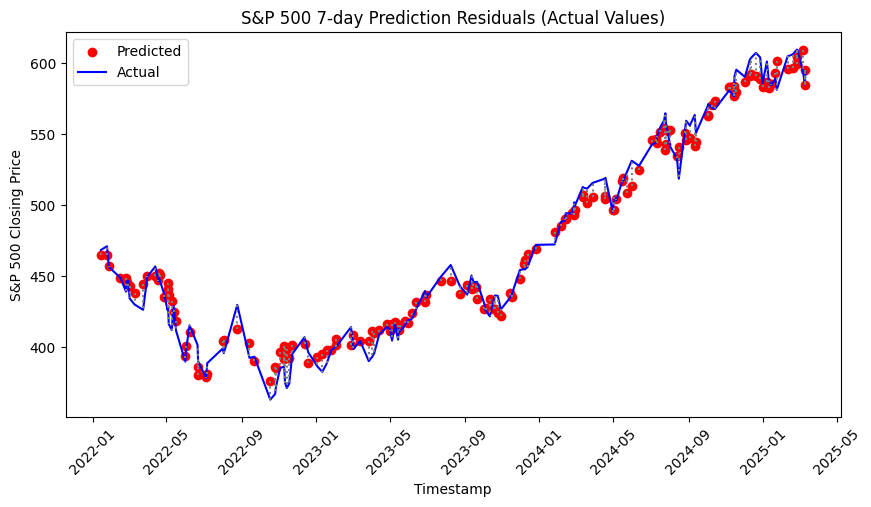

Epoch 1/50
39/39 [==============================] - 1s 3ms/step - loss: 0.3796 - mae: 0.5015 - val_loss: 0.1349 - val_mae: 0.3035
Epoch 2/50
39/39 [==============================] - 0s 1ms/step - loss: 0.1944 - mae: 0.3459 - val_loss: 0.0986 - val_mae: 0.2513
Epoch 3/50
39/39 [==============================] - 0s 942us/step - loss: 0.1499 - mae: 0.2945 - val_loss: 0.0859 - val_mae: 0.2319
Epoch 4/50
39/39 [==============================] - 0s 902us/step - loss: 0.1365 - mae: 0.2831 - val_loss: 0.0715 - val_mae: 0.2120
Epoch 5/50
39/39 [==============================] - 0s 956us/step - loss: 0.1070 - mae: 0.2534 - val_loss: 0.0631 - val_mae: 0.2017
Epoch 6/50
39/39 [==============================] - 0s 889us/step - loss: 0.1212 - mae: 0.2669 - val_loss: 0.0630 - val_mae: 0.2022
Epoch 7/50
39/39 [==============================] - 0s 927us/step - loss: 0.0933 - mae: 0.2381 - val_loss: 0.0581 - val_mae: 0.1905
Epoch 8/50
39/39 [==============================] - 0s 869us/step - loss: 0.0947

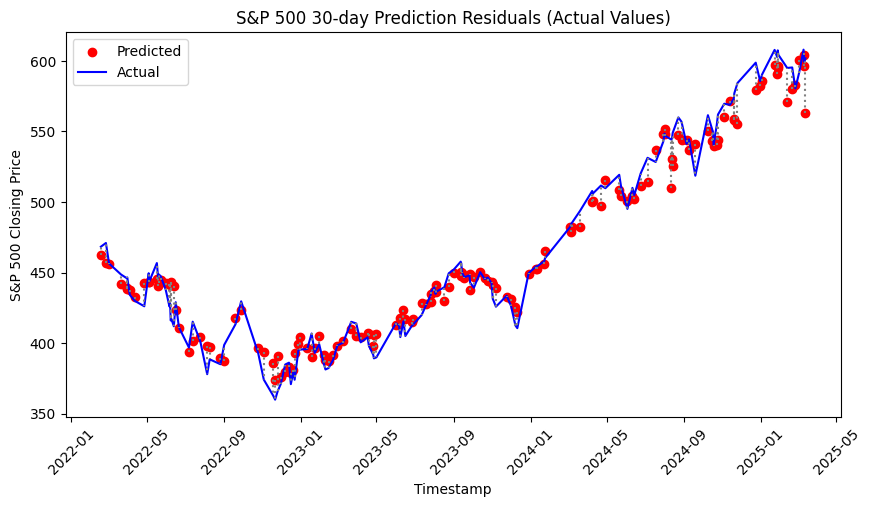

Epoch 1/50
32/32 [==============================] - 0s 3ms/step - loss: 0.3545 - mae: 0.4817 - val_loss: 0.1737 - val_mae: 0.3449
Epoch 2/50
32/32 [==============================] - 0s 1ms/step - loss: 0.1999 - mae: 0.3645 - val_loss: 0.1160 - val_mae: 0.2689
Epoch 3/50
32/32 [==============================] - 0s 1ms/step - loss: 0.1634 - mae: 0.3257 - val_loss: 0.0915 - val_mae: 0.2270
Epoch 4/50
32/32 [==============================] - 0s 1ms/step - loss: 0.1559 - mae: 0.3134 - val_loss: 0.0793 - val_mae: 0.2114
Epoch 5/50
32/32 [==============================] - 0s 980us/step - loss: 0.1345 - mae: 0.2850 - val_loss: 0.0734 - val_mae: 0.1966
Epoch 6/50
32/32 [==============================] - 0s 1ms/step - loss: 0.1193 - mae: 0.2722 - val_loss: 0.0674 - val_mae: 0.1920
Epoch 7/50
32/32 [==============================] - 0s 972us/step - loss: 0.1044 - mae: 0.2503 - val_loss: 0.0641 - val_mae: 0.1779
Epoch 8/50
32/32 [==============================] - 0s 968us/step - loss: 0.1037 - mae

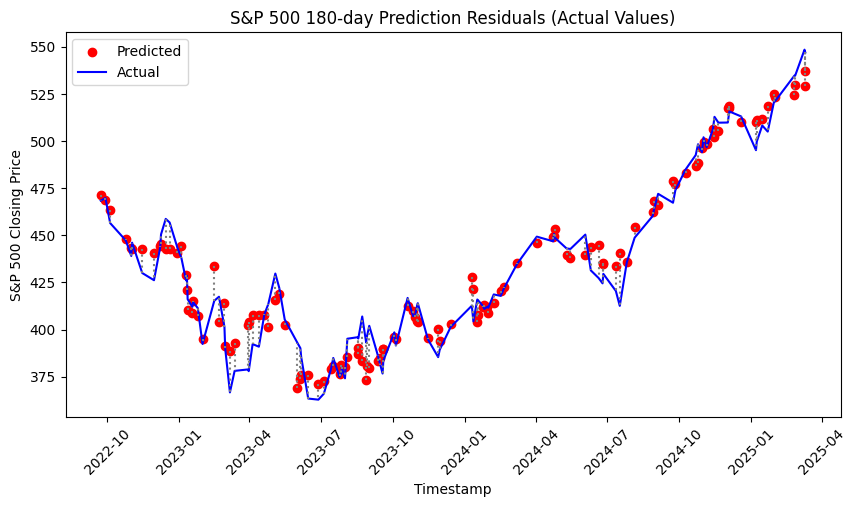


Final results: {7: {'R²': 0.9836553194875672, 'MAE': 7.8944127880552335, 'MSE': 98.19130774167007, 'RMSE': 9.90915272572131}, 30: {'R²': 0.9798041463431325, 'MAE': 8.456401099420388, 'MSE': 125.42565957702985, 'RMSE': 11.19935978424793}, 180: {'R²': 0.9513171875183161, 'MAE': 7.720300371093749, 'MSE': 102.38445644380324, 'RMSE': 10.118520467133683}}


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define file path
data_path = "data"
file_names = {
    "bitcoin": "bitcoin.csv",
    "gold": "gold.csv",
    "google_trends": "google_trends.csv",
    "sp500": "sp500.csv",
    "treasury_3m": "treasury_3m.csv",
    "treasury_10y": "treasury_10y.csv",
}

# Load datasets
data = {}
for key, file in file_names.items():
    file_path = os.path.join(data_path, file)
    if os.path.exists(file_path):
        df = pd.read_csv(file_path, parse_dates=["timestamp"])
        df.replace({'.': np.nan}, inplace=True)  # Replace non-numeric values with NaN
        for col in df.columns:
            if col != "timestamp":
                df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric
        data[key] = df
    else:
        print(f"File not found: {file_path}")

# Merge datasets on timestamp
sp500 = data["sp500"]
sp500 = sp500.rename(columns={"Close": "sp500_close"})
all_data = sp500[["timestamp", "sp500_close"]]

for key, df in data.items():
    if key != "sp500" and df is not None:
        all_data = all_data.merge(df, on="timestamp", how="left")

# Convert timestamp to datetime and sort
all_data["timestamp"] = pd.to_datetime(all_data["timestamp"])
all_data.sort_values("timestamp", inplace=True)

# Fill missing values
all_data.fillna(method='ffill', inplace=True)

# Save original sp500 scaler
sp500_scaler = StandardScaler()
all_data["sp500_close"] = sp500_scaler.fit_transform(all_data[["sp500_close"]])

# Normalize features
feature_scaler = StandardScaler()
all_data.iloc[:, 1:] = feature_scaler.fit_transform(all_data.iloc[:, 1:])

# Define prediction intervals
prediction_intervals = [7, 30, 180]
results = {}

for interval in prediction_intervals:
    # Create target column
    all_data[f"sp500_target_{interval}"] = all_data["sp500_close"].shift(interval)

    # Drop rows with NaN target values
    model_data = all_data.dropna(subset=[f"sp500_target_{interval}"])

    # Define features and target
    feature_columns = [col for col in model_data.columns if col not in ["timestamp"] + [f"sp500_target_{i}" for i in prediction_intervals]]
    X = model_data[feature_columns].values
    y = model_data[f"sp500_target_{interval}"].values
    timestamps = model_data["timestamp"].values

    # Reshape input for CNN (samples, time steps, features)
    X = X.reshape(X.shape[0], 1, X.shape[1])  # 1 time step (single-day feature input)

    # Split data
    X_train, X_test, y_train, y_test, timestamps_train, timestamps_test = train_test_split(
        X, y, timestamps, test_size=0.2, random_state=42
    )

    # Build CNN model
    model = Sequential([
        Conv1D(filters=64, kernel_size=1, activation="relu", input_shape=(1, X.shape[2])),
        Dropout(0.2),
        Conv1D(filters=32, kernel_size=1, activation="relu"),
        Flatten(),
        Dense(32, activation="relu"),
        Dropout(0.2),
        Dense(1)  # Output layer (single value prediction)
    ])

    model.compile(optimizer=Adam(learning_rate=0.001), loss="mse", metrics=["mae"])

    # Train model
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=50,
        batch_size=16,
        verbose=1
    )

    # Predict
    y_pred = model.predict(X_test).flatten()

    # Inverse transform target values to actual S&P 500 prices
    y_test_actual = sp500_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    y_pred_actual = sp500_scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()

    # Evaluate
    r2 = np.corrcoef(y_test_actual, y_pred_actual)[0, 1]**2  # Approximate R² score
    mae = np.mean(np.abs(y_test_actual - y_pred_actual))
    mse = np.mean((y_test_actual - y_pred_actual) ** 2)
    rmse = np.sqrt(mse)
    results[interval] = {"R²": r2, "MAE": mae, "MSE": mse, "RMSE": rmse}

    print(f"\nResults for {interval}-day prediction:")
    print(f"R²: {r2:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")

    # Plot predictions
    sorted_indices = np.argsort(timestamps_test)
    timestamps_sorted = timestamps_test[sorted_indices]
    y_test_sorted = y_test_actual[sorted_indices]
    y_pred_sorted = y_pred_actual[sorted_indices]

    plt.figure(figsize=(10, 5))
    plt.scatter(timestamps_sorted, y_pred_sorted, label="Predicted", color='red', marker='o')
    plt.plot(timestamps_sorted, y_test_sorted, label="Actual", color='blue')
    for i in range(len(timestamps_sorted)):
        plt.plot([timestamps_sorted[i], timestamps_sorted[i]], [y_pred_sorted[i], y_test_sorted[i]], color='gray', linestyle='dotted')
    plt.title(f"S&P 500 {interval}-day Prediction Residuals (Actual Values)")
    plt.xlabel("Timestamp")
    plt.ylabel("S&P 500 Closing Price")
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

# Output final results
print("\nFinal results:", results)
